### Building Models with Sklearn Pipelines

Building machine learning models using `sklearn` pipelines. This approach ensures:
- **Modularity**: Components such as preprocessing, modeling, and evaluation are separated for flexibility.
- **Code Cleanliness**: The pipeline structure keeps the code organized and easier to maintain.
- **Reproducibility**: Using pipelines ensures the entire modeling process can be easily replicated.



#### Directory setup

Allowing for imports from modules located in the parent directory 

by modifies the Python path to include the parent directory of the current working directory, 

- `os.path.dirname(os.getcwd())`: Retrieves the parent directory of the current working directory.
- `sys.path.insert(0, ...)`: Inserts this parent directory at the start of `sys.path`, giving it priority for module imports.

In [1]:
import os
import sys

sys.path.insert(0,os.path.dirname(os.getcwd()))

#### Importing required modules and package

In [2]:
import pandas as pd
from scripts.data_accessing import DataAccessor
from scripts.data_preprocessing import DataProcess
from scripts.sklean_model import Model

In [3]:
# Path to the data sets

data_path_sample="../Data/sample_submission.csv"
data_path_store="../Data/store.csv"
data_path_train="../Data/train.csv"
data_path_test="../Data/test.csv"

#### Reading Data

In [4]:
sampleData=DataAccessor(data_path_sample)
storeData=DataAccessor(data_path_store)
trainData=DataAccessor(data_path_train)
testData=DataAccessor(data_path_test)

In [5]:
# Accessing Data

df_sample=sampleData.read_data()
df_store=storeData.read_data()
df_train=trainData.read_data()
df_test=testData.read_data()

INFO:root:Dataset loaded successfully
INFO:root:Dataset loaded successfully
d:\10Academy\Week4\scripts\data_accessing.py:34: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(self.data_path)
INFO:root:Dataset loaded successfully
INFO:root:Dataset loaded successfully


In [6]:
processing=DataProcess()

store,train,test=processing.merging_store(df_store,df_train,df_test)

In [7]:
train,test, preprocessor=processing.feature_engineering(train, test)

In [8]:
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['CompetitionDistance', 'CompetitionOpenTime',
                                  'Promo2OpenTime', 'DayOfWeek']),
                                ('cat', OneHotEncoder(),
                                 ['StoreType', 'Assortment', 'StateHoliday',
                                  'PromoInterval'])])

In [11]:
# Convert numerical values to strings for the entire 'StateHoliday' column
train["StateHoliday"] = train["StateHoliday"].astype(str)

In [13]:
sklearn_model=Model()

INFO:scripts.sklean_model:Model class initialized.


### Explanation:

1. **Pipeline**: 
   - The pipeline integrates preprocessing steps (such as scaling and encoding) with the model training (using `RandomForestRegressor`). 
   - This modular approach ensures consistency between training and testing, maintaining an efficient workflow.

2. **Cross-Validation**: 
   - We use 5-fold cross-validation to evaluate model robustness. This provides an estimate of model performance across different data subsets, ensuring reliability.

3. **Model Evaluation**: 
   - After training, predictions are made on the test data, and two key metrics are calculated:
     - **Root Mean Squared Error (RMSE)**: Measures prediction accuracy. Lower RMSE values indicate better model performance.
     - **R² Score**: Indicates how well the model explains the variance in the target variable (Sales). Higher values suggest a better fit.


In [14]:
pipeline, X_train, X_test, y_train, y_test=sklearn_model.model(train, preprocessor)

INFO:scripts.sklean_model:Preparing the data and creating the model pipeline.
INFO:scripts.sklean_model:Pipeline successfully created.


In [15]:
pipeline=sklearn_model.model_train(X_train,y_train,pipeline)

INFO:scripts.sklean_model:Training the model.
INFO:scripts.sklean_model:Model training complete.


### Model Performance Analysis:


In [16]:
mean_cv_rsme=sklearn_model.cross_val(pipeline, X_train,y_train)

INFO:scripts.sklean_model:Performing cross-validation.
INFO:scripts.sklean_model:Cross-Validation RMSE: 1689.5276


- **Cross-Validation RMSE**: 1689.62  
  - This indicates that, during cross-validation, the predicted sales deviate from the actual sales by an average of 1689.62 units. This metric helps evaluate how well the model will generalize to unseen data.


#### Choosing a Loss Function

##### Common Loss Functions for Regression:

1. **Mean Squared Error (MSE):**

   **Formula:**
   \[
   \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
   \]

   **Interpretation:**
   MSE is the average of the squared differences between actual and predicted values. It penalizes large errors more heavily than small ones.

   **Use Case:**
   MSE is suitable for regression problems where large deviations are critical to minimize. In sales forecasting, it's useful if large errors carry significant business costs.

In [17]:
y_pred=sklearn_model.prediction(X_test,pipeline)

INFO:scripts.sklean_model:Making predictions on the test data.
INFO:scripts.sklean_model:Predictions completed.


In [18]:
rmse,mae,r2=sklearn_model.evaluate_model(y_test,y_pred)

INFO:scripts.sklean_model:Evaluating the model.
INFO:scripts.sklean_model:Test RMSE: 1684.4853
INFO:scripts.sklean_model:Test MAE: 1069.7096
INFO:scripts.sklean_model:R^2 Score: 0.8081


- **Test RMSE**: 1684.22  
  - The test set RMSE of 1684.22 is very close to the cross-validation RMSE, indicating that the model generalizes well to new data and performs consistently.

- **R² Score**: 0.808  
  - The R² score of 0.808 means that 80.8% of the variance in sales is explained by the model’s features. A score closer to 1 suggests a strong model, and this result indicates the model captures key patterns in the data effectively.


In [26]:
# huber_loss_val=sklearn_model.huber_loss(X_train,y_train,X_test,y_test)

INFO:scripts.sklean_model:Performing post-prediction analysis.


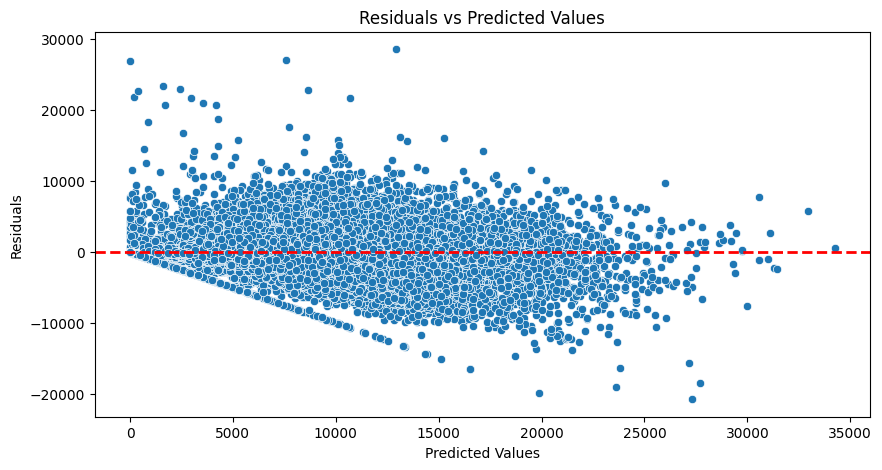

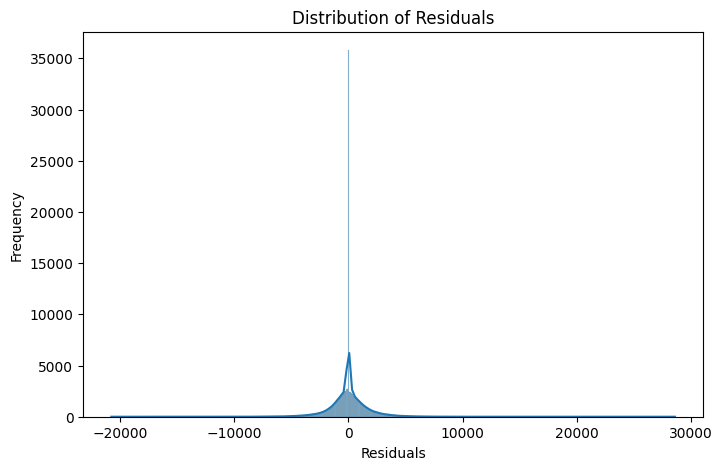

In [20]:
sklearn_model.post_prediction_analysis(y_test,y_pred)

### Residuals and Model Diagnostics

1. **Residuals vs. Predicted Values**:
   - **Pattern**: Residuals should ideally be randomly scattered around zero, indicating unbiased error distribution.
   - **Observation**: Residual spread increases with higher predicted values, showing heteroscedasticity (error variance increases with larger sales predictions). Some large outliers suggest the model struggles with extreme values.
   - **Actionable Insight**: Investigate transformations (e.g., log) or advanced modeling to address variance issues. Analyze outliers to improve prediction accuracy.

2. **Distribution of Residuals**:
   - **Normality**: Residuals should follow a normal distribution for regression models.
   - **Observation**: Residuals are centered around zero but with long tails, indicating occasional large errors (positive and negative outliers).
   - **Actionable Insight**: Consider outlier analysis and feature engineering to reduce the impact of large residuals.

### General Findings:
- The model handles most predictions well, but heteroscedasticity and large errors need attention. Improving higher-value predictions and addressing outliers will enhance performance.


INFO:scripts.sklean_model:Analyzing feature importance for RandomForestRegressor.


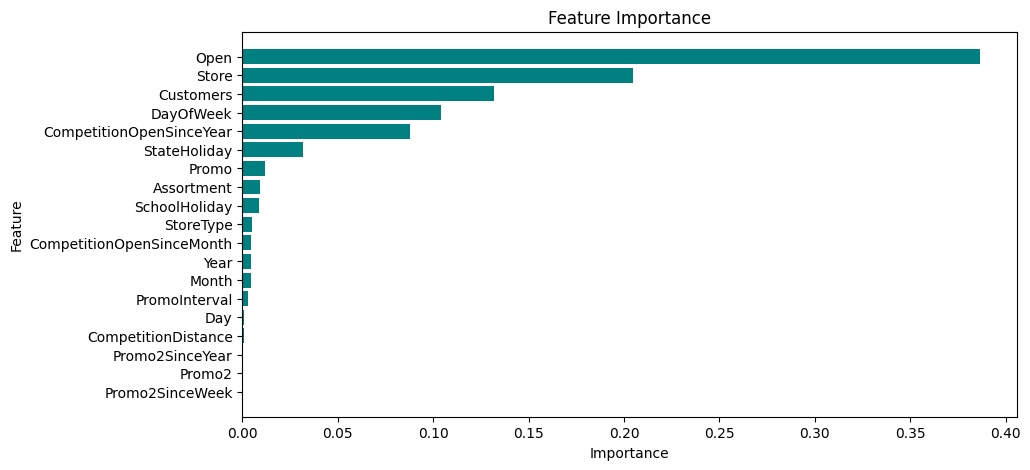

In [22]:
sklearn_model.feature_importance(pipeline,X_train.columns)

### Key Insights from Feature Importance Plot

1. **Most Important Features**:
   - **Open and Store**: These are the top two critical features, as store status (open/closed) and the specific store heavily influence sales figures.
   - **Customers**: More customers typically lead to higher sales, but the model's generalizability might be limited without customer data.
   - **DayOfWeek**: Sales fluctuate based on the day, with differences between weekdays and weekends.

2. **Moderately Important Features**:
   - **CompetitionOpenSinceYear & StateHoliday**: External factors such as competition and holidays moderately affect sales.
   - **Promo**: Promotional activities impact sales, but less than expected, possibly due to encoding or implementation issues.

3. **Least Important Features**:
   - Features like **Promo2SinceWeek**, **Promo2**, **Promo2SinceYear**, **CompetitionDistance**, and **Day** have minimal importance, possibly due to redundancy or lack of direct influence.

### Actionable Insights:
- **Focus on Critical Features**: Prioritize "Open," "Store," "Customers," and "DayOfWeek" for further refinement, such as feature engineering or interaction terms.
- **Handle Less Important Features**: Consider removing low-impact features to reduce model complexity, speed up training, and prevent overfitting.


In [24]:
sklearn_model.save_model(pipeline,"../result/model.pkl")

INFO:scripts.sklean_model:Saving the model to ../result/model.pkl
INFO:scripts.sklean_model:Model saved successfully to ../result/model.pkl
